In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 10000  # kisebb példa
dates = pd.date_range(start="2025-01-01", end="2025-12-31")
random_dates = np.random.choice(dates, size=n)
napos = np.random.randint(1, 50, size=n)

df = pd.DataFrame({
    "sorszam": range(1, n + 1),
    "datum": random_dates,
    "irat_napok": napos
})

# Minden irathoz létrehozzuk a napi sorokat
expanded_rows = []

for _, row in df.iterrows():
    for i in range(1, row["irat_napok"] + 1):
        expanded_rows.append({
            "sorszam": row["sorszam"],
            "datum": row["datum"] + pd.Timedelta(days=i-1),
            "napos": i
        })

df_expanded = pd.DataFrame(expanded_rows)
print(df_expanded.head())

   sorszam      datum  napos
0        1 2025-10-31      1
1        1 2025-11-01      2
2        1 2025-11-02      3
3        1 2025-11-03      4
4        1 2025-11-04      5


In [5]:
# Kategorizálás
df_expanded["kategoriak"] = pd.cut(
    df_expanded["napos"],
    bins=[0, 15, 30, df_expanded["napos"].max()],
    labels=["0-15", "16-30", "30+"]
)

# Csoportosítás dátum és kategória szerint
eredmeny = df_expanded.groupby(["datum", "kategoriak"]).size().unstack(fill_value=0).sort_index()
eredmeny.reset_index().to_clipboard(index=False)

C:\Users\laszl\AppData\Local\Temp\ipykernel_17960\2978753166.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eredmeny = df_expanded.groupby(["datum", "kategoriak"]).size().unstack(fill_value=0).sort_index()


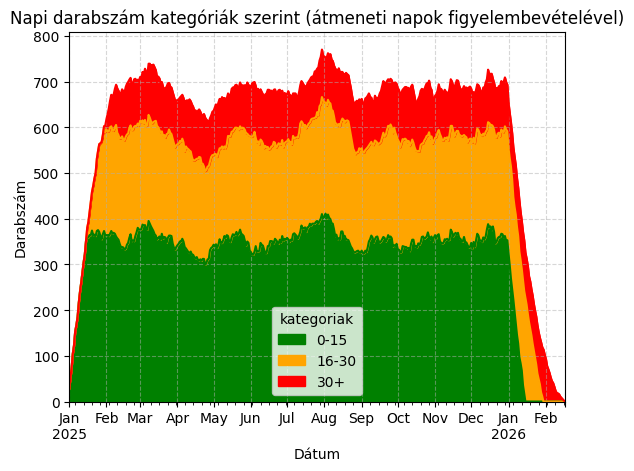

In [6]:
# Ábra
eredmeny.plot(kind="area", stacked=True,  color=["green", "orange", "red"])
plt.title("Napi darabszám kategóriák szerint (átmeneti napok figyelembevételével)")
plt.xlabel("Dátum")
plt.ylabel("Darabszám")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()